## EXPLORACION - EDA Votaciones 2018 Queretaro 

##### Huerta Ramírez Michael Adolfo , Guerrero Paisano Jesedh

In [309]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder

In [310]:
dataset = pd.read_csv('dataset.csv')

In [311]:
dataset.head(3)

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_DISTRITO_LOCAL,DISTRITO_LOCAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,OBSERVACIONES,CONTABILIZADA,MECANISMOS_TRASLADO,SHA,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO
0,220277B0100,220277B0100,22,QUERETARO,1,QUERETARO 01,277,961,B,0,...,NaN,1.0,D,77B4E74C39AA83026388F7148239AF76816E8B6D29CC03...,02/07/2018 01:18,02/07/2018 02:18,02/07/2018 04:25,CATD,ESCANER,ACTA PREP
1,220277C0100,220277C0100,22,QUERETARO,1,QUERETARO 01,277,962,C,0,...,NaN,1.0,D,C055A6A27C574F57BE0185476BC19756D0290CB26C9FB6...,02/07/2018 01:17,02/07/2018 04:40,02/07/2018 05:41,CATD,ESCANER,ACTA PREP
2,220277C0200,220277C0200,22,QUERETARO,1,QUERETARO 01,277,963,C,0,...,NaN,1.0,D,83A57141BC2CB59F7A4D43069AF9DBBA5B13B61320FC59...,02/07/2018 00:42,02/07/2018 01:03,02/07/2018 01:15,CATD,ESCANER,ACTA PREP


In [312]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 83 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CLAVE_CASILLA                 2648 non-null   object 
 1   CLAVE_ACTA                    2648 non-null   object 
 2   ID_ESTADO                     2648 non-null   int64  
 3   ESTADO                        2648 non-null   object 
 4   ID_DISTRITO_LOCAL             2648 non-null   int64  
 5   DISTRITO_LOCAL                2648 non-null   object 
 6   SECCION                       2648 non-null   int64  
 7   ID_CASILLA                    2648 non-null   int64  
 8   TIPO_CASILLA                  2648 non-null   object 
 9   EXT_CONTIGUA                  2648 non-null   int64  
 10  UBICACION_CASILLA             2648 non-null   object 
 11  TIPO_ACTA                     2648 non-null   int64  
 12  TOTAL_BOLETAS_SOBRANTES       2475 non-null   object 
 13  TOT

Contar valores nulos

In [313]:

print(dataset.isnull().sum())

CLAVE_CASILLA                0
CLAVE_ACTA                   0
ID_ESTADO                    0
ESTADO                       0
ID_DISTRITO_LOCAL            0
                          ... 
FECHA_HORA_CAPTURA         173
FECHA_HORA_VERIFICACION    212
ORIGEN                       0
DIGITALIZACION               0
TIPO_DOCUMENTO             173
Length: 83, dtype: int64


Imprimir las filas donde existan datos en la columna 'OBSERVACIONES'

In [314]:

dataset[dataset['OBSERVACIONES'].notnull()]


,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_DISTRITO_LOCAL,DISTRITO_LOCAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,OBSERVACIONES,CONTABILIZADA,MECANISMOS_TRASLADO,SHA,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO
12,220278C0300,220278C0300,22,QUERETARO,1,QUERETARO 01,278,981,C,0,...,ALGUN CAMPO ILEGIBLE O SIN DATO,1.0,D,CB0A7FBF945F9DAD204726AF11C012EEC7CBA98E7C43B6...,02/07/2018 01:15,02/07/2018 02:48,02/07/2018 05:14,CATD,ESCANER,ACTA PREP
19,220278C1000,220278C1000,22,QUERETARO,1,QUERETARO 01,278,972,C,0,...,ALGUN CAMPO ILEGIBLE O SIN DATO,1.0,D,DA9B9B7E0B67F35924EDF48FC7D4ACB15DFC71F2E98E3E...,02/07/2018 00:45,02/07/2018 01:21,02/07/2018 02:04,CATD,ESCANER,ACTA PREP
33,220288C0100,220288C0100,22,QUERETARO,1,QUERETARO 01,288,1022,C,0,...,SIN ACTA POR PAQUETE NO ENTREGADO,NaN,D,NaN,02/07/2018 00:12,NaN,NaN,CATD,ESCANER,NaN
38,220303B0100,220303B0100,22,QUERETARO,1,QUERETARO 01,303,1059,B,0,...,TODOS ILEGIBLES O SIN DATO,0.0,D,508A2C5A7DEDCE248F59FD07C4E24DF6F4D3D5EEC80870...,02/07/2018 00:28,02/07/2018 05:10,NaN,CATD,ESCANER,ACTA PREP
49,220305C0400,220305C0400,22,QUERETARO,1,QUERETARO 01,305,1074,C,0,...,ALGUN CAMPO ILEGIBLE O SIN DATO,1.0,D,1A5DC373010E9BDC3224541BCBDCB55A28D96EF9565691...,02/07/2018 00:49,02/07/2018 01:20,02/07/2018 01:51,CATD,ESCANER,ACTA PREP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,'220261E0100,'220261E0100,22,QUERETARO,15,JALPAN DE SERRA,261,890,E,0,...,ALGUN CAMPO ILEGIBLE O SIN DATO,1.0,D,F39B181CF88154728799B271841C72F321CB6B23C323A5...,02/07/2018 00:54,02/07/2018 01:11,02/07/2018 01:15,CATD,ESCANER,CC
2629,'220263E0100,'220263E0100,22,QUERETARO,15,JALPAN DE SERRA,263,894,E,0,...,ALGUN CAMPO ILEGIBLE O SIN DATO,1.0,D,B66B615D1636F97037C8AB5AC9501D9D1ADB31D475E4AE...,01/07/2018 22:42,01/07/2018 22:59,01/07/2018 23:04,CATD,ESCANER,ACTA PREP
2630,220264B0100,220264B0100,22,QUERETARO,15,JALPAN DE SERRA,264,895,B,0,...,ALGUN CAMPO ILEGIBLE O SIN DATO,1.0,D,A55D75B6C1984618E8596825A7A7B2DAB4391BACD04D08...,02/07/2018 02:40,02/07/2018 02:53,02/07/2018 03:00,CATD,ESCANER,ACTA PREP
2638,220558B0100,220558B0100,22,QUERETARO,15,JALPAN DE SERRA,558,1861,B,0,...,ALGUN CAMPO ILEGIBLE O SIN DATO,1.0,D,50C138348533CF7D3E09DEF49B51402EF2E5CD8D13B159...,02/07/2018 04:29,02/07/2018 04:44,02/07/2018 04:48,CATD,ESCANER,RPP


Mostrar los diferentes tipos de OBSERVACIONES

In [315]:
dataset['OBSERVACIONES'].unique()


array([nan, 'ALGUN CAMPO ILEGIBLE O SIN DATO',
       'SIN ACTA POR PAQUETE NO ENTREGADO', 'TODOS ILEGIBLES O SIN DATO',
       'SIN ACTA POR PAQUETE ENTREGADO SIN SOBRE', 'EXCEDE LISTA NOMINAL',
       'SIN ACTA POR CASILLA NO INSTALADA'], dtype=object)

Eliminar las casillas con observaciones que muestran que no son funcionales (Dependiendo la necesidad )

In [316]:
#dataset = dataset[dataset['OBSERVACIONES'] != 'SIN ACTA POR PAQUETE NO ENTREGADO']
dataset = dataset[dataset['OBSERVACIONES'] != 'TODOS ILEGIBLES O SIN DATO']
#dataset = dataset[dataset['OBSERVACIONES'] != 'SIN ACTA POR PAQUETE ENTREGADO SIN SOBRE']
#dataset = dataset[dataset['OBSERVACIONES'] != 'SIN ACTA POR CASILLA NO INSTALADA']

Agrupamos una parte del dataset para realizar observaciones

In [317]:
primer_hallazgo = ['TOTAL_VOTOS_SACADOS', 'PAN', 'PRI', 'PRD', 'MC', 'PANAL', 'PVEM', 'PES', 'M', 'PT', 'CQ', 'QI', 'MORENA_PT_PES',
                    'MORENA_PT', 'MORENA_PES', 'PT_PES', 'PRI_PVEM', 'PAN_PRD_MC', 'PAN_PRD', 'PAN_MC', 'PRD_MC',  'NO_REGISTRADOS', 'NULOS', 'TOTAL_VOTOS_ASENTADO']
df_1 = dataset.loc[:, primer_hallazgo]

In [318]:
df_1.head(3)

,TOTAL_VOTOS_SACADOS,PAN,PRI,PRD,MC,PANAL,PVEM,PES,M,PT,...,MORENA_PES,PT_PES,PRI_PVEM,PAN_PRD_MC,PAN_PRD,PAN_MC,PRD_MC,NO_REGISTRADOS,NULOS,TOTAL_VOTOS_ASENTADO
0,435,121,54,11,15,2,19,9,134,6,...,1,0,NaN,NaN,4,NaN,NaN,0,16,435
1,444,124,56,3,18,4,14,6,135,12,...,1,0,NaN,NaN,4,NaN,NaN,2,12,444
2,429,108,68,9,6,7,8,12,126,11,...,2,0,NaN,NaN,6,NaN,NaN,0,18,429


In [319]:
df_1 = df_1.fillna(0)
#reemplazar los valores - por 0
df_1 = df_1.replace('-', 0)
#reemplazar los valores Ilegible por 0
df_1 = df_1.replace('Ilegible', 0)
#reemplazar los valores Sin dato por 0
df_1 = df_1.replace('Sin dato', 0)

In [320]:
#sumar los votos de la columna PAN y crear una nueva columna con el total de votos llamada PAN_TOTAL
df_1['PAN_TOTAL'] = df_1['PAN'] 
df_1['PAN_TOTAL'] = df_1['PAN_TOTAL'].astype(int)

df_1['PRI_TOTAL'] = df_1['PRI'] 
df_1['PRI_TOTAL'] = df_1['PRI_TOTAL'].astype(int)

df_1['PRD_TOTAL'] = df_1['PRD']
df_1['PRD_TOTAL'] = df_1['PRD_TOTAL'].astype(int)

df_1['MC_TOTAL'] = df_1['MC']
df_1['MC_TOTAL'] = df_1['MC_TOTAL'].astype(int)

df_1['PVEM_TOTAL'] = df_1['PVEM']
df_1['PVEM_TOTAL'] = df_1['PVEM_TOTAL'].astype(int)

df_1['PES_TOTAL'] = df_1['PES']
df_1['PES_TOTAL'] = df_1['PES_TOTAL'].astype(int)

df_1['M_TOTAL'] = df_1['M']
df_1['M_TOTAL'] = df_1['M_TOTAL'].astype(int)

df_1['PT_TOTAL'] = df_1['PT']
df_1['PT_TOTAL'] = df_1['PT_TOTAL'].astype(int)

df_1['CQ_TOTAL'] = df_1['CQ']
df_1['CQ_TOTAL'] = df_1['CQ_TOTAL'].astype(int)

df_1['QI_TOTAL'] = df_1['QI']
df_1['QI_TOTAL'] = df_1['QI_TOTAL'].astype(int)

df_1['MORENA_PT_PES_TOTAL'] = df_1['MORENA_PT_PES']
df_1['MORENA_PT_PES_TOTAL'] = df_1['MORENA_PT_PES_TOTAL'].astype(int)

df_1['MORENA_PT_TOTAL'] = df_1['MORENA_PT']
df_1['MORENA_PT_TOTAL'] = df_1['MORENA_PT_TOTAL'].astype(int)

df_1['MORENA_PES_TOTAL'] = df_1['MORENA_PES']
df_1['MORENA_PES_TOTAL'] = df_1['MORENA_PES_TOTAL'].astype(int)

df_1['PT_PES_TOTAL'] = df_1['PT_PES']
df_1['PT_PES_TOTAL'] = df_1['PT_PES_TOTAL'].astype(int)

df_1['PRI_PVEM_TOTAL'] = df_1['PRI_PVEM']
df_1['PRI_PVEM_TOTAL'] = df_1['PRI_PVEM_TOTAL'].astype(int)

df_1['PAN_PRD_MC_TOTAL'] = df_1['PAN_PRD_MC']
df_1['PAN_PRD_MC_TOTAL'] = df_1['PAN_PRD_MC_TOTAL'].astype(int)

df_1['PAN_PRD_TOTAL'] = df_1['PAN_PRD']
df_1['PAN_PRD_TOTAL'] = df_1['PAN_PRD_TOTAL'].astype(int)

df_1['PAN_MC_TOTAL'] = df_1['PAN_MC']
df_1['PAN_MC_TOTAL'] = df_1['PAN_MC_TOTAL'].astype(int)

df_1['PRD_MC_TOTAL'] = df_1['PRD_MC']
df_1['PRD_MC_TOTAL'] = df_1['PRD_MC_TOTAL'].astype(int)

df_1['NO_REGISTRADOS_TOTAL'] = df_1['NO_REGISTRADOS']
df_1['NO_REGISTRADOS_TOTAL'] = df_1['NO_REGISTRADOS_TOTAL'].astype(int)

df_1['NULOS_TOTAL'] = df_1['NULOS']
df_1['NULOS_TOTAL'] = df_1['NULOS_TOTAL'].astype(int)

df_1['TOTAL_VOTOS_ASENTADO_TOTAL'] = df_1['TOTAL_VOTOS_ASENTADO']
df_1['TOTAL_VOTOS_ASENTADO_TOTAL'] = df_1['TOTAL_VOTOS_ASENTADO_TOTAL'].astype(int)

In [321]:
PRI_TOTAL = df_1['PRI_TOTAL'].sum()
PAN_TOTAL = df_1['PAN_TOTAL'].sum() 
PRD_TOTAL = df_1['PRD_TOTAL'].sum() 
MC_TOTAL = df_1['MC_TOTAL'].sum() 
PVEM_TOTAL = df_1['PVEM_TOTAL'].sum() 
PES_TOTAL = df_1['PES_TOTAL'].sum() 
M_TOTAL = df_1['M_TOTAL'].sum() 
PT_TOTAL = df_1['PT_TOTAL'].sum() 
CQ_TOTAL = df_1['CQ_TOTAL'].sum() 
QI_TOTAL = df_1['QI_TOTAL'].sum() 
MORENA_PT_PES_TOTAL = df_1['MORENA_PT_PES_TOTAL'].sum() 
MORENA_PT_TOTAL = df_1['MORENA_PT_TOTAL'].sum() 
MORENA_PES_TOTAL = df_1['MORENA_PES_TOTAL'].sum() 
PT_PES_TOTAL = df_1['PT_PES_TOTAL'].sum() 
PRI_PVEM_TOTAL = df_1['PRI_PVEM_TOTAL'].sum() 
PAN_PRD_MC_TOTAL = df_1['PAN_PRD_MC_TOTAL'].sum() 
PAN_PRD_TOTAL = df_1['PAN_PRD_TOTAL'].sum() 
PAN_MC_TOTAL = df_1['PAN_MC_TOTAL'].sum() 
PRD_MC_TOTAL = df_1['PRD_MC_TOTAL'].sum() 
NO_REGISTRADOS_TOTAL = df_1['NO_REGISTRADOS_TOTAL'].sum() 
NULOS_TOTAL = df_1['NULOS_TOTAL'].sum() 
TOTAL_VOTOS_ASENTADO_TOTAL = df_1['TOTAL_VOTOS_ASENTADO_TOTAL'].sum()

Graficar los votos totales de cada partido

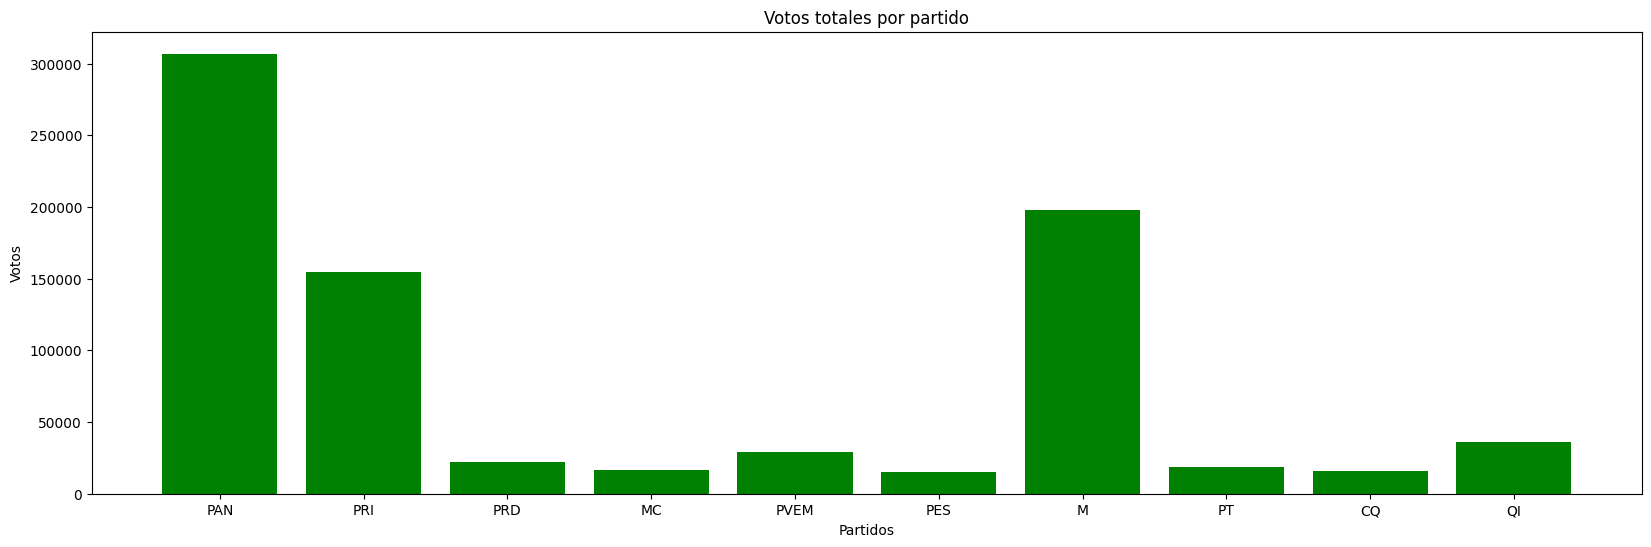

In [322]:
partidos = ['PAN', 'PRI', 'PRD', 'MC', 'PVEM', 'PES', 'M', 'PT','CQ', 'QI']
votos = [PAN_TOTAL, PRI_TOTAL, PRD_TOTAL, MC_TOTAL, PVEM_TOTAL, PES_TOTAL, M_TOTAL, PT_TOTAL ,CQ_TOTAL, QI_TOTAL,]
plt.figure(figsize=(20, 6))
plt.bar(partidos, votos, color='green')
plt.title('Votos totales por partido')
plt.xlabel('Partidos')
plt.ylabel('Votos')
plt.show()

Graficar los votos totales de cada partido faltantes 

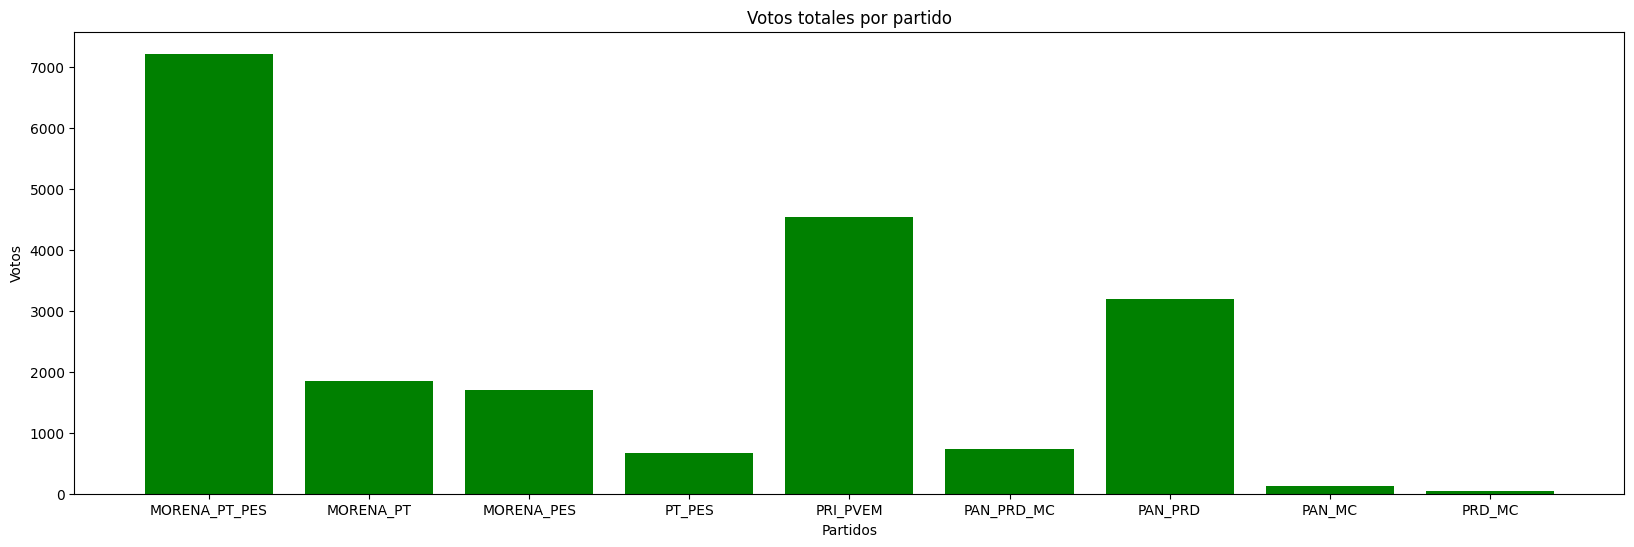

In [323]:

partidos = [ 'MORENA_PT_PES', 'MORENA_PT', 'MORENA_PES', 'PT_PES', 'PRI_PVEM', 'PAN_PRD_MC', 'PAN_PRD', 'PAN_MC', 'PRD_MC']
votos = [ MORENA_PT_PES_TOTAL, MORENA_PT_TOTAL, MORENA_PES_TOTAL, PT_PES_TOTAL, PRI_PVEM_TOTAL, PAN_PRD_MC_TOTAL, PAN_PRD_TOTAL, PAN_MC_TOTAL, PRD_MC_TOTAL]
plt.figure(figsize=(20, 6))
plt.bar(partidos, votos, color='green')
plt.title('Votos totales por partido')
plt.xlabel('Partidos')
plt.ylabel('Votos')
plt.show()


Graficar por porcentaje los votos totales de cada partido 

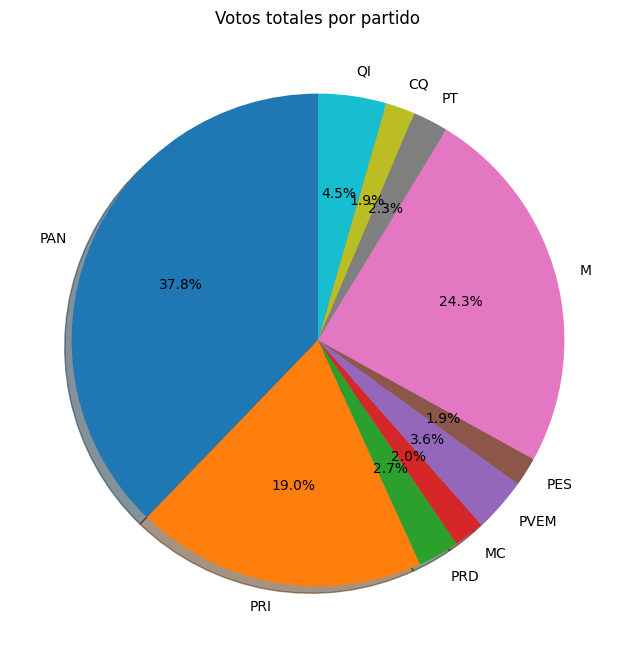

In [324]:
partidos = ['PAN', 'PRI', 'PRD', 'MC', 'PVEM', 'PES', 'M', 'PT','CQ', 'QI']
votos = [PAN_TOTAL, PRI_TOTAL, PRD_TOTAL, MC_TOTAL, PVEM_TOTAL, PES_TOTAL, M_TOTAL, PT_TOTAL ,CQ_TOTAL, QI_TOTAL,]
plt.figure(figsize=(18, 8))
plt.pie(votos, labels=partidos, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Votos totales por partido')
plt.show()

Graficar por porcentaje los votos totales de cada partido faltantes

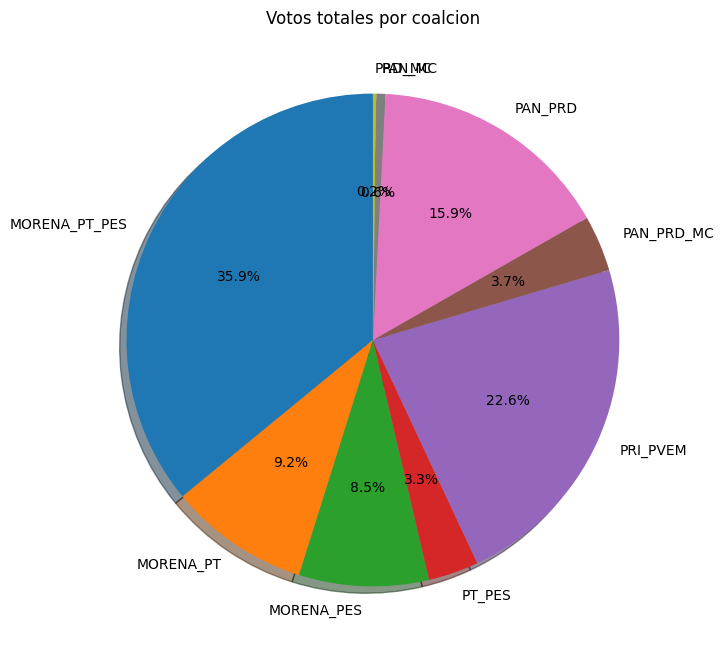

In [325]:
partidos = [ 'MORENA_PT_PES', 'MORENA_PT', 'MORENA_PES', 'PT_PES', 'PRI_PVEM', 'PAN_PRD_MC', 'PAN_PRD', 'PAN_MC', 'PRD_MC']
votos = [ MORENA_PT_PES_TOTAL, MORENA_PT_TOTAL, MORENA_PES_TOTAL, PT_PES_TOTAL, PRI_PVEM_TOTAL, PAN_PRD_MC_TOTAL, PAN_PRD_TOTAL, PAN_MC_TOTAL, PRD_MC_TOTAL]
plt.figure(figsize=(18, 8))
plt.pie(votos, labels=partidos, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Votos totales por coalcion')
plt.show()

In [326]:
segundo_hallazgo = [ 'PAN', 'PRI', 'PRD', 'MC', 'PANAL', 'PVEM', 'PES', 'M', 'PT', 'CQ', 'QI', 'MORENA_PT_PES', 
                    'MORENA_PT', 'MORENA_PES', 'PT_PES', 'PRI_PVEM', 'PAN_PRD_MC', 'PAN_PRD', 'PAN_MC', 'PRD_MC',  'NO_REGISTRADOS', 'NULOS' ,'UBICACION_CASILLA','SECCION']
df_2 = dataset.loc[:, segundo_hallazgo]

In [327]:
#reemplazar los valores nulos por 0
df_2 = df_2.fillna(0)
#reemplazar los valores - por 0
df_2 = df_2.replace('-', 0)
#reemplazar los valores Ilegible por 0
df_2 = df_2.replace('Ilegible', 0)
#reemplazar los valores Sin dato por 0
df_2 = df_2.replace('Sin dato', 0)

Convertir de datos categoricos a datos numericos la columna ubicacion casilla

In [328]:
df_2['UBICACION_CASILLA'] = df_2['UBICACION_CASILLA'].astype('category')
df_2['UBICACION_CASILLA'] = df_2['UBICACION_CASILLA'].cat.codes
df_2

,PAN,PRI,PRD,MC,PANAL,PVEM,PES,M,PT,CQ,...,PT_PES,PRI_PVEM,PAN_PRD_MC,PAN_PRD,PAN_MC,PRD_MC,NO_REGISTRADOS,NULOS,UBICACION_CASILLA,SECCION
0,121,54,11,15,2,19,9,134,6,5,...,0,0,0,4,0,0,0,16,1,277
1,124,56,3,18,4,14,6,135,12,3,...,0,0,0,4,0,0,2,12,1,277
2,108,68,9,6,7,8,12,126,11,9,...,0,0,0,6,0,0,0,18,1,277
3,106,64,9,15,2,15,10,113,8,9,...,0,0,0,6,0,0,0,17,1,277
4,114,56,1,7,0,5,3,132,10,12,...,0,0,0,3,0,0,1,13,1,277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,72,65,7,3,11,8,5,40,9,2,...,0,0,0,1,0,1,1,24,0,560
2644,45,44,8,0,0,0,0,4,2,1,...,0,0,0,3,1,0,0,6,0,560
2645,28,21,1,1,1,1,0,20,1,1,...,0,0,0,0,0,0,0,8,0,561
2646,19,37,2,1,3,1,0,12,0,1,...,0,0,0,0,0,0,0,16,0,561


/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_71698/396666859.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm')


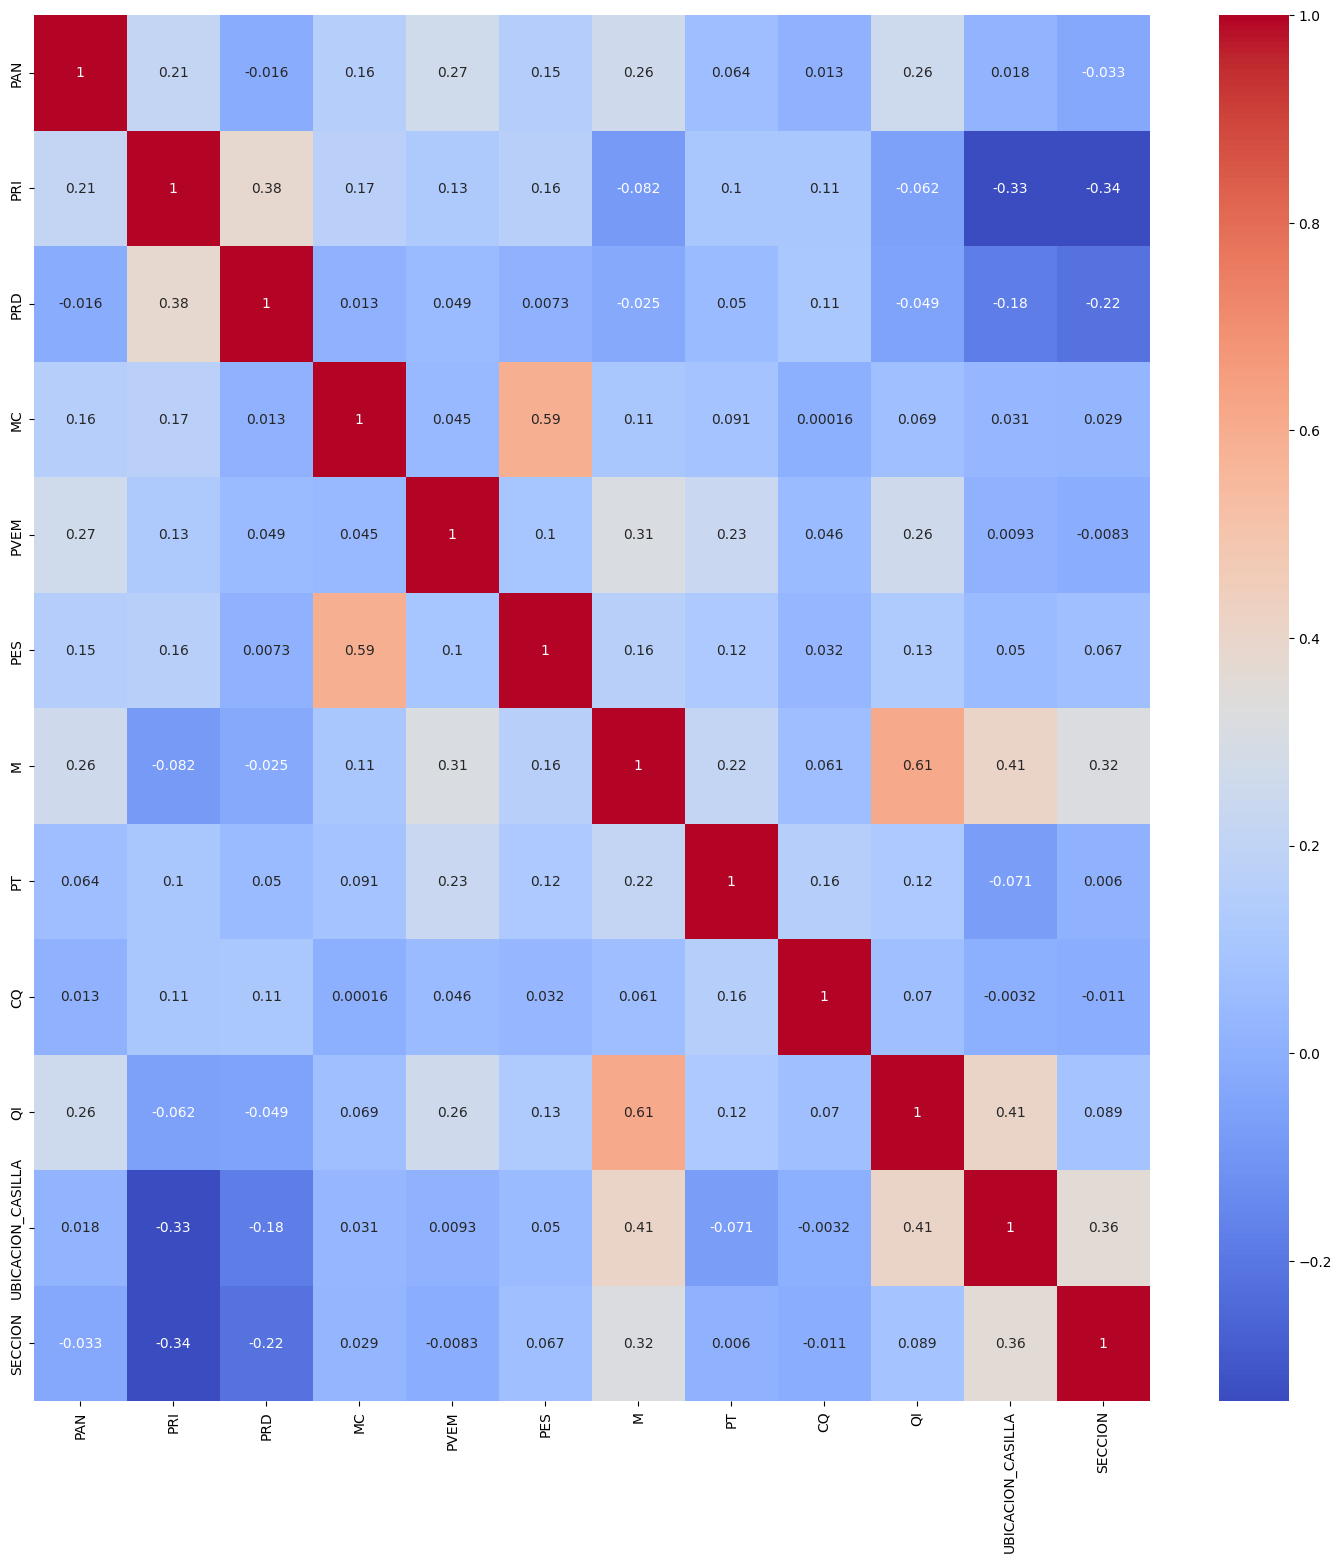

In [343]:
#crear mapa de calor para ver la correlacion entre las variables 
plt.figure(figsize=(18, 18))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm')
plt.show()  


URBANA 1 | NO_URBANA 0

<Axes: >

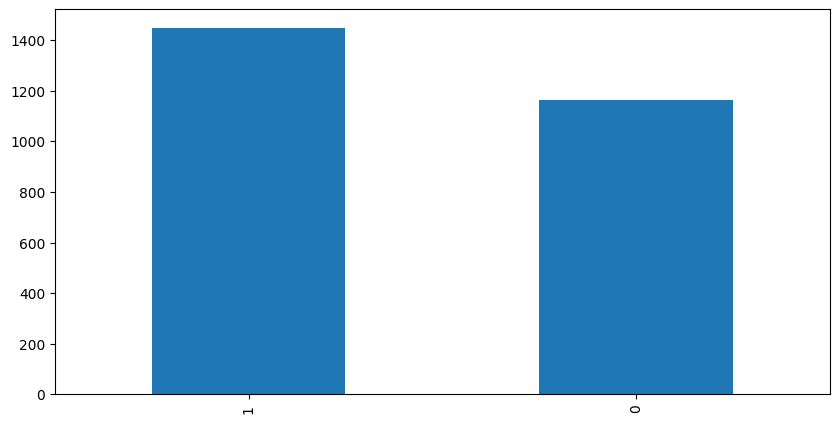

In [330]:
df_2['UBICACION_CASILLA'].value_counts().plot(kind='bar', figsize=(10, 5))

In [331]:
df_2.head(3)

,PAN,PRI,PRD,MC,PANAL,PVEM,PES,M,PT,CQ,...,PT_PES,PRI_PVEM,PAN_PRD_MC,PAN_PRD,PAN_MC,PRD_MC,NO_REGISTRADOS,NULOS,UBICACION_CASILLA,SECCION
0,121,54,11,15,2,19,9,134,6,5,...,0,0,0,4,0,0,0,16,1,277
1,124,56,3,18,4,14,6,135,12,3,...,0,0,0,4,0,0,2,12,1,277
2,108,68,9,6,7,8,12,126,11,9,...,0,0,0,6,0,0,0,18,1,277


In [332]:
import pandas as pd


df_2['PAN'] = df_2['PAN'].astype(int)
df_2['PRI'] = df_2['PRI'].astype(int)
df_2['PRD'] = df_2['PRD'].astype(int)
df_2['MC'] = df_2['MC'].astype(int)
df_2['PVEM'] = df_2['PVEM'].astype(int)
df_2['PES'] = df_2['PES'].astype(int)
df_2['M'] = df_2['M'].astype(int)
df_2['PT'] = df_2['PT'].astype(int)
df_2['CQ'] = df_2['CQ'].astype(int)
df_2['QI'] = df_2['QI'].astype(int)

resultadosPan = df_2.groupby('UBICACION_CASILLA')['PAN'].sum().reset_index()
resultadosPri = df_2.groupby('UBICACION_CASILLA')['PRI'].sum().reset_index()
resultadosPrd = df_2.groupby('UBICACION_CASILLA')['PRD'].sum().reset_index()
resultadosMc = df_2.groupby('UBICACION_CASILLA')['MC'].sum().reset_index()
resultadosPvem = df_2.groupby('UBICACION_CASILLA')['PVEM'].sum().reset_index()
resultadosPes = df_2.groupby('UBICACION_CASILLA')['PES'].sum().reset_index()
resultadosM = df_2.groupby('UBICACION_CASILLA')['M'].sum().reset_index()
resultadosPt = df_2.groupby('UBICACION_CASILLA')['PT'].sum().reset_index()
resultadosCq = df_2.groupby('UBICACION_CASILLA')['CQ'].sum().reset_index()
resultadosQi = df_2.groupby('UBICACION_CASILLA')['QI'].sum().reset_index()

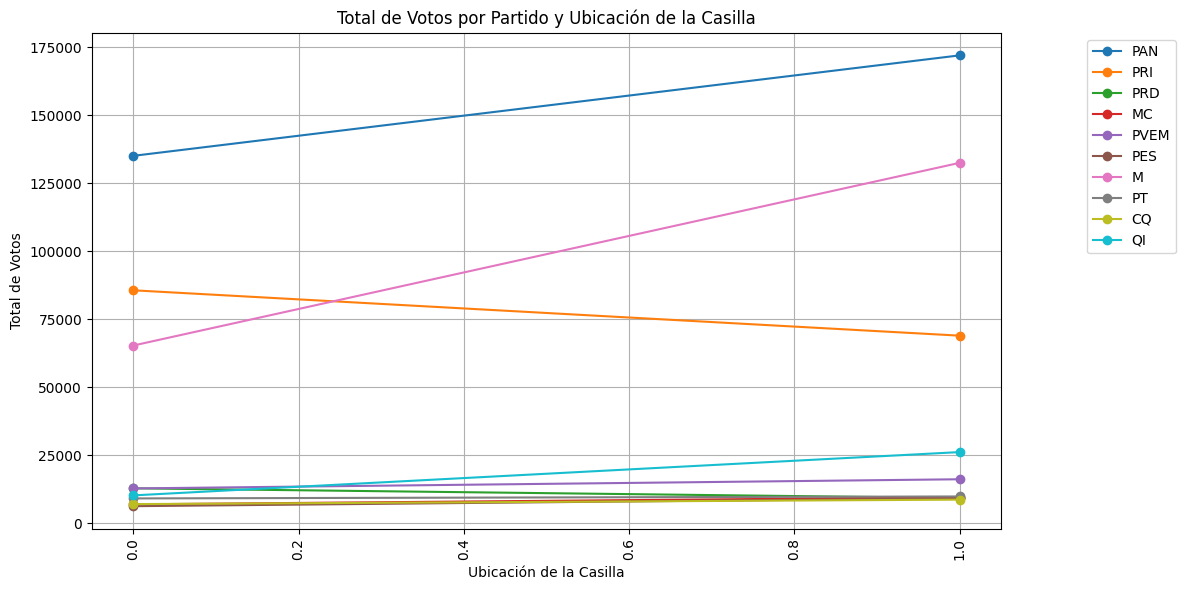

In [333]:
ubicaciones = resultadosPan['UBICACION_CASILLA']
votos_pan = resultadosPan['PAN']
votos_pri = resultadosPri['PRI']
votos_prd = resultadosPrd['PRD']
votos_mc = resultadosMc['MC']
votos_pvem = resultadosPvem['PVEM']
votos_pes = resultadosPes['PES']
votos_m = resultadosM['M']
votos_pt = resultadosPt['PT']
votos_cq = resultadosCq['CQ']
votos_qi = resultadosQi['QI']

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(ubicaciones, votos_pan, label='PAN', marker='o')
ax.plot(ubicaciones, votos_pri, label='PRI', marker='o')
ax.plot(ubicaciones, votos_prd, label='PRD', marker='o')
ax.plot(ubicaciones, votos_mc, label='MC', marker='o')
ax.plot(ubicaciones, votos_pvem, label='PVEM', marker='o')
ax.plot(ubicaciones, votos_pes, label='PES', marker='o')
ax.plot(ubicaciones, votos_m, label='M', marker='o')
ax.plot(ubicaciones, votos_pt, label='PT', marker='o')
ax.plot(ubicaciones, votos_cq, label='CQ', marker='o')
ax.plot(ubicaciones, votos_qi, label='QI', marker='o')

ax.set_xlabel('Ubicación de la Casilla')
ax.set_ylabel('Total de Votos')
ax.set_title('Total de Votos por Partido y Ubicación de la Casilla')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.xticks(rotation=90)

plt.tight_layout()
plt.grid(True)  
plt.show()

In [334]:
import pandas as pd

df_2['PAN'] = df_2['PAN'].astype(int)
df_2['PRI'] = df_2['PRI'].astype(int)
df_2['PRD'] = df_2['PRD'].astype(int)
df_2['MC'] = df_2['MC'].astype(int)
df_2['PVEM'] = df_2['PVEM'].astype(int)
df_2['PES'] = df_2['PES'].astype(int)
df_2['M'] = df_2['M'].astype(int)
df_2['PT'] = df_2['PT'].astype(int)
df_2['CQ'] = df_2['CQ'].astype(int)
df_2['QI'] = df_2['QI'].astype(int)


In [335]:
resultadosPan = df_2.groupby('SECCION')['PAN'].sum().reset_index()
resultadosPri = df_2.groupby('SECCION')['PRI'].sum().reset_index()
resultadosPrd = df_2.groupby('SECCION')['PRD'].sum().reset_index()
resultadosMc = df_2.groupby('SECCION')['MC'].sum().reset_index()
resultadosPvem = df_2.groupby('SECCION')['PVEM'].sum().reset_index()
resultadosPes = df_2.groupby('SECCION')['PES'].sum().reset_index()
resultadosM = df_2.groupby('SECCION')['M'].sum().reset_index()
resultadosPt = df_2.groupby('SECCION')['PT'].sum().reset_index()
resultadosCq = df_2.groupby('SECCION')['CQ'].sum().reset_index()
resultadosQi = df_2.groupby('SECCION')['QI'].sum().reset_index()


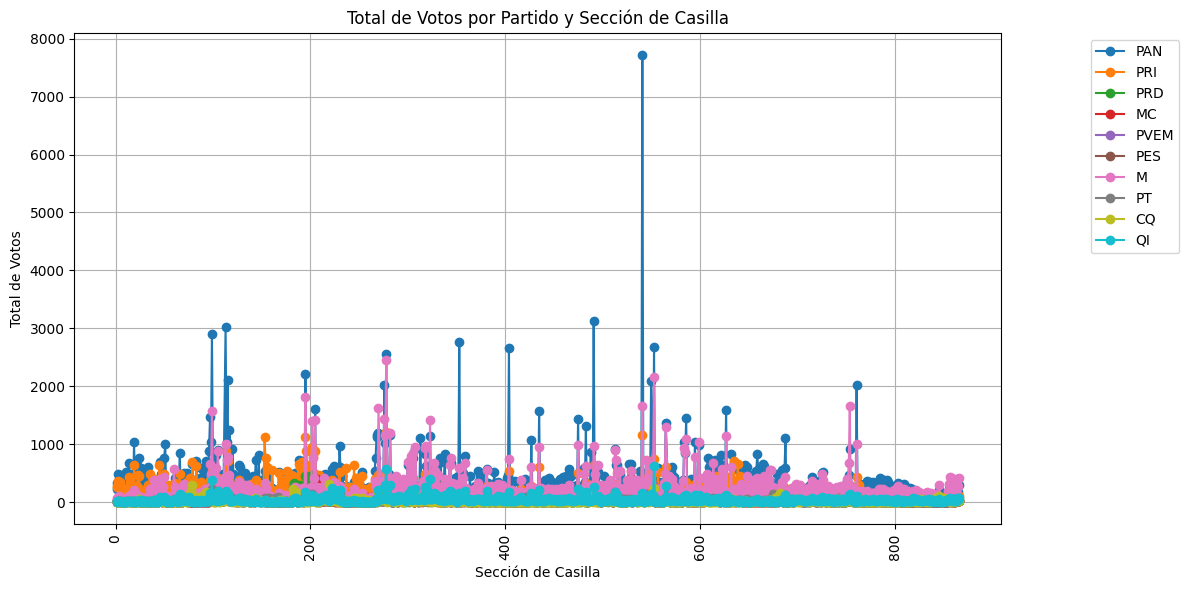

In [336]:
secciones = resultadosPan['SECCION']
votos_pan = resultadosPan['PAN']
votos_pri = resultadosPri['PRI']
votos_prd = resultadosPrd['PRD']
votos_mc = resultadosMc['MC']
votos_pvem = resultadosPvem['PVEM']
votos_pes = resultadosPes['PES']
votos_m = resultadosM['M']
votos_pt = resultadosPt['PT']
votos_cq = resultadosCq['CQ']
votos_qi = resultadosQi['QI']

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(secciones, votos_pan, label='PAN', marker='o')
ax.plot(secciones, votos_pri, label='PRI', marker='o')
ax.plot(secciones, votos_prd, label='PRD', marker='o')
ax.plot(secciones, votos_mc, label='MC', marker='o')
ax.plot(secciones, votos_pvem, label='PVEM', marker='o')
ax.plot(secciones, votos_pes, label='PES', marker='o')
ax.plot(secciones, votos_m, label='M', marker='o')
ax.plot(secciones, votos_pt, label='PT', marker='o')
ax.plot(secciones, votos_cq, label='CQ', marker='o')
ax.plot(secciones, votos_qi, label='QI', marker='o')

ax.set_xlabel('Sección de Casilla')
ax.set_ylabel('Total de Votos')
ax.set_title('Total de Votos por Partido y Sección de Casilla')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.xticks(rotation=90)

plt.tight_layout()
plt.grid(True)
plt.show()


In [337]:
import pandas as pd

data = {'SECCION': df_2['SECCION'], 'PAN': df_2['PAN'], 'PRD': df_2['PRD'], 'MC': df_2['MC'], 'PVEM': df_2['PVEM'], 'PES': df_2['PES'], 'M': df_2['M'], 'PT': df_2['PT'], 'CQ': df_2['CQ'], 'QI': df_2['QI']}
df = pd.DataFrame(data)

df['PAN'] = df['PAN'].astype(int)
df['PRD'] = df['PRD'].astype(int)

resultados_seccion = df.groupby('SECCION').sum().reset_index()

resultados_seccion['Total_Votos'] = resultados_seccion['PAN'] + resultados_seccion['PRD']

seccion_con_mas_votos = resultados_seccion.loc[resultados_seccion['Total_Votos'].idxmax()]

print(f"La sección con más votos fue la SECCION {seccion_con_mas_votos['SECCION']} con un total de {seccion_con_mas_votos['Total_Votos']} votos.")


La sección con más votos fue la SECCION 541 con un total de 7812 votos.


In [338]:
seccion_mas_votos = resultados_seccion.loc[resultados_seccion['Total_Votos'].idxmax()]

partido_ganador = seccion_mas_votos[['PAN', 'PRD', 'MC', 'PVEM', 'PES', 'M', 'PT', 'CQ', 'QI']].idxmax()

print(f"En la SECCION {seccion_mas_votos['SECCION']} el partido ganador fue {partido_ganador}.")

En la SECCION 541 el partido ganador fue PAN.


In [339]:
seccion_menos_votos_PAN = resultados_seccion.loc[resultados_seccion['PAN'].idxmin()]

print(f"La SECCION con menos votos para el PAN fue la SECCION {seccion_menos_votos_PAN['SECCION']} con {seccion_menos_votos_PAN['PAN']} votos para el PAN.")


La SECCION con menos votos para el PAN fue la SECCION 499 con 0 votos para el PAN.


----------------------------------

### Cartografia de secciones Queretaro

https://ieeq.mx/contenido/elecciones/2014_2015/cartografia/distrito3.html

Buscamos la demografia de los  votantes de la seccion __541__ 

------------------

<small>REAL DE JURIQUILLA, PROVINCIA JURIQUILLA, LA ACEQUIA BLANCA, BORDO LA LAGARTIJA, LA TROJE, FRACCIONAMIENTOS: [VILLAS DEL MESON, TOLIMAN, LA CAÑADA, BALCONES DE JURIQUILLA, JURICA MISIONES, PRIVADA DE LOS PORTONES, JURIQUILLA SANTA FE, JOCKEY CLUB, CALETO, LOS NARANJOS I, II Y III, ALTAVISTA JURIQUILLA, PUNTA JURIQUILLA, PARAISO DIAMANTE, LA HERRADURA, VILLAS LA SOLANA, NUEVO PARAISO, MAYORAL 1 Y 2, JURICA SAN FRANCISCO, PARAISO, PUERTA PARAISO, EL FARO, JURICA ACUEDUCTO, CUMBRES DEL LAGO, REAL DEL LAGO, JURIQUILLA CAMPESTRE, JURIQUILLA (LOMAS), PRIVADA JURIQUILLA, FUENTES DE LA VILLA RICA, ALTA RICA, GRAN PUERTA PARAISO, GRAN PUERTA PARAISO 2, RINCONADA SANTINI JURIQUILLA, LA RICA, LA MURALLA, VILLA CAPRI 1ª Y 2ª SECCION, ECOLOGICO LA RICA, VALLE JURIQUILLA, RINCON DEL ANGEL, JURIQUILLA HACIENDA GRANDE, HABITAREA TOWERS, CAPRICHO 2, COLINAS DE JURIQUILLA, VIVE HACIENDA GRANDE, LA CONDESA], CONDOMINIOS: [LA CAÑADA, LA CIMA, LA ESCONDIDA, TERRAZAS VISTA LAGO, LA JOYA, VISTA LAGO, BALCONES DE JURIQUILLA, EL RINCON DE BALCONES Y MIRADOR DEL LAGO], RESIDENCIALES: [JARDINES DE JURIQUILLA, PASEO DEL PIROPO, LOS ENCINOS, RESIDENCIAL LA LUNA Y FRACCIONAMIENTO PARAISO], JURIQUILLA SANTA FE: [CONDOMINIOS: PUERTA SANTA FE II, JARDINES SANTA FE, VILLA TOSCANA Y LOMAS DE SANTA FE], FRACCIONAMIENTO JURIQUILLA SANTA FE: [TORRES PREMIER, RINCON DE SANTA FE, ENSUEÑO, EL SECRETO, DOS LUNAS, VILLA TOSCANA,AZUL, EL SUSPIRO, PENINSULA, EL RESPIRO, EL CAPRICHO, EL NUEVO CAPRICHO, ATENAS, AURA, ALTEZA, PASEO LIVORNIO, AZUL], RESIDENCIAL JURIQUILLA SANTA FE: [LAS LUNAS, EL CIELO, Y EL ENCANTO), JURIQUILLA SANTA FE: [CONDOMINIOS: MANZANARES, Q HOME VALLEY, MURANO, HACIENDA JURIQUILLA SANTA FE, VALLE JURIQUILLA II, EL DESTINO, VALLE DE MANZANOS, DOLCE TERRA, BLUE, LA CASTELLANA, VIVE JURIQUILLA, EL SILENCIO, ACUA, EL DELIRIO, LOS OLIVOS, QUINTAS LAS ACACIAS], PRIVADA JURIQUILLA SANTA FE (SANTA FE), SAN ISIDRO [FRACCIONAMIENTOS: SAN JUAN, ARROYO SECO, BELLA VISTA, MIRADOR, LA ARBOLEDA, YUCA]</small>

### Acerca de

El próspero vecindario residencial de Juriquilla alberga los campus de las universidades UVM y UNAM. Los centros comerciales con tiendas de moda se encuentran junto a los restaurantes mexicanos, los bares estudiantiles y las cantinas tradicionales de Boulevard Universitario, y los restaurantes de gastronomía sofisticada de la plaza Náutica sirven cocina internacional con vista a la tranquila presa de Juriquilla. Golf Juriquilla es un campo de 18 hoyos con palmeras y cactus

------------------

Por otro lado la seccion 40 que compende de varias colonias como los son -> __EL JARDIN, EL PINO (MESA DEL PINO), SAN JOSE DEL TEPAME, LOS NOGALES__ , son personas que no se interesaron por votar por el partido, siendo que es una poblacion completamente rural

https://mexico.pueblosamerica.com/i/nogales-12/

In [340]:
tercer_hallazgo = ['FECHA_HORA_ACOPIO','FECHA_HORA_CAPTURA', 'FECHA_HORA_VERIFICACION','ID_CASILLA']
df_3 = dataset.loc[:, tercer_hallazgo]

In [341]:
df_3['FECHA_HORA_ACOPIO'] = pd.to_datetime(df_3['FECHA_HORA_ACOPIO'], format='%d/%m/%Y %H:%M')
df_3['FECHA_HORA_VERIFICACION'] = pd.to_datetime(df_3['FECHA_HORA_VERIFICACION'], format='%d/%m/%Y %H:%M')

df_3['TIEMPO_ACOPIO_VERIFICACION'] = (df_3['FECHA_HORA_VERIFICACION'] - df_3['FECHA_HORA_ACOPIO']).dt.total_seconds() / 60

casilla_mas_rapida = df_3.loc[df_3['TIEMPO_ACOPIO_VERIFICACION'].idxmin()]

print(f"La casilla más rápida en completar el proceso fue la ID_CASILLA {casilla_mas_rapida['ID_CASILLA']} con un tiempo de {casilla_mas_rapida['TIEMPO_ACOPIO_VERIFICACION']} minutos.")

La casilla más rápida en completar el proceso fue la ID_CASILLA 1443 con un tiempo de 3.0 minutos.


Esa misma casilla tuvo 343 votos , un poco por debajo del promedio de votos que es 377.71 , esta dentro de la seccion 0445


In [342]:
df_3['FECHA_HORA_ACOPIO'] = pd.to_datetime(df_3['FECHA_HORA_ACOPIO'], format='%d/%m/%Y %H:%M')
df_3['FECHA_HORA_VERIFICACION'] = pd.to_datetime(df_3['FECHA_HORA_VERIFICACION'], format='%d/%m/%Y %H:%M')

df_3['TIEMPO_ACOPIO_VERIFICACION'] = (df_3['FECHA_HORA_VERIFICACION'] - df_3['FECHA_HORA_ACOPIO']).dt.total_seconds() / 60


casilla_mas_lenta = df_3.loc[df_3['TIEMPO_ACOPIO_VERIFICACION'].idxmax()]

print(f"La casilla más lenta en completar el proceso fue la ID_CASILLA {casilla_mas_lenta['ID_CASILLA']} con un tiempo de {casilla_mas_lenta['TIEMPO_ACOPIO_VERIFICACION']} minutos.")

La casilla más lenta en completar el proceso fue la ID_CASILLA 362 con un tiempo de 657.0 minutos.


La casilla 362 tuvo 204 votos ubicada en la seccion 113, tardando la mayor parte del tiempo entre acopio y captura